> [NOTE] : Download(`File -> Download .ipynb`) this notebook to your PC then you can perform task.

# **Vela Pulsar Data Analysis and Dynamic Spectrogram**
---
- #### What you will be performing ?
    - In this task you will be performing FFT(Fast Fourier Transform) of time-series data.
    - You will be making Dynamic Spectrum using Welch's method.
    - You will be finding probability distribution of `time-series data` and `|FFT(data)|` by plotting histogram.
- #### Learning resources :
    - You should be familiar with basic array operations with `numpy` library.
    - What is fourier transform ?
        1. [3b1b's video](https://www.youtube.com/watch?v=spUNpyF58BY)
        2. [Discrete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
        3. For more detailed understanding see this book: _(Prentice Hall international editions) J G Proakis D G Manolakis - Digital signal processing _ principles, algorithms, and applications-Prentice-Hall (2006)_ >>> can be found [here](https://drive.google.com/file/d/1BQXHnSXUpMUkzovLqXOv5WKCQP0QiA1C/view?usp=sharing).
        4. NumPy documentation of `np.fft.fft` i.e. [Fast fourier transform](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
    - Making Dynamic Spectrum using Welch's method or Bartlett's method :
        1. Refer 14th chapter of [this book](https://drive.google.com/file/d/1BQXHnSXUpMUkzovLqXOv5WKCQP0QiA1C/view?usp=sharing) for understanding dyanamic spectrum
        2. See this [paper](https://drive.google.com/file/d/1Jslf8qF4mlu33ngCkhCuVRXUARo-AMa-/view?usp=sharing) -> you can refer first page of paper for making Dynamic Spectrum(PSD) using Welch's method.
    - Different Probability Distributions:
        1. [3b1b's video](https://www.youtube.com/watch?v=8idr1WZ1A7Q&t=455s) -> see part 2 also.
        2. [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)
        > Although you will be studying many Probability Distributions in your `MATH F113`(Probability and Statistics) Course.
- #### Data, You will be using:
    - Data is provided from Ooty Observation taken during CHERA 2015.
    - File is in .mbr format(can be read by `np.loadtxt(<filename>)` )
    - After loading data in a numpy array you will have two columns for containing [512 x 6000] rows.
    - Data is sampled at 33 MHz (Nyquist Rate - 16.5 MHz wide spectral band) at centre frequency 326.5 MHz
    - The two columns correspond to North half and South half of the Ooty Telescope, separately.
    ---


##### Importing libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading data using `np.loadtxt`

In [3]:
ls


TASK_1_2020.ipynb  vela_Pulsar.mbr


In [4]:
data = np.loadtxt("vela_Pulsar.mbr")

print(data.shape)


(30720000, 2)


In [5]:
# Extract two columns of data and store it in two variables

north_data = data[:,0]
south_data = data[:,1]

#north_data = np.asarray(north_data) 
#south_data = np.asarray(south_data) 

print( north_data.shape)
print( south_data.shape)

(30720000,)
(30720000,)


Resizing the `north_data` and `south_data` to `512 x 60000`(column wise) to get frequency spectrum of given data :

In [6]:
# two lines of code
# use np.reshape
north_data = north_data.reshape(512,60000, order='F')
south_data = south_data.reshape(512,60000, order='F')
print( north_data.shape)
print( south_data.shape)

(512, 60000)
(512, 60000)


Now getting Fourier-Transform of all columns of `north_data` and `south_data` and getting their square of absolute values :

In [7]:
# Use for-loop in columns to get fft of column and take its square of absolute value
#nd = [[]]
#fft_nd = []
fft_nd = np.fft.fft(north_data, axis = 0)
fft_nd = np.absolute(fft_nd)
fft_nd = np.square(fft_nd)    
print(fft_nd.shape) 


(512, 60000)


In [8]:
fft_sd = np.fft.fft(south_data, axis = 0)
fft_sd = np.absolute(fft_sd)
fft_sd = np.square(fft_sd)       
print(fft_sd.shape) 


(512, 60000)


Now Reducing the **Noise(gaussian)** and also getting reqiured time-resolution :

In [9]:
# You can average 60 columns(row wise) to reduce noise so 60000 columns will be reduced to 1000 columns
fft_nd1 = fft_nd.reshape(-1,60).mean(1).reshape(512,-1)
fft_sd1 = fft_sd.reshape(-1,60).mean(1).reshape(512,-1)
#fft_nd1 = fft_nd.reshape([512,1,1000, 60]).mean(3).mean(1)
print(fft_nd1.shape)
print(fft_sd1.shape)

(512, 1000)
(512, 1000)


Plotting the resultant matrix(got from previous cell) of shape `(512,1000)` using `matplotlib` Library , where column number correspondes to frequency and row number corresponds to time :

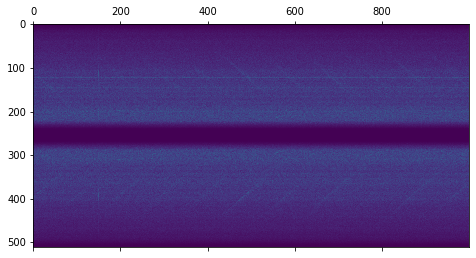

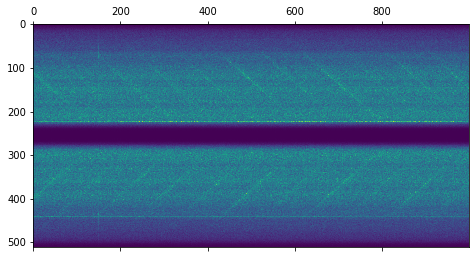

In [10]:
# Use plt.matshow function to plot the matrix
plt.matshow(fft_nd1, interpolation='nearest', aspect='auto',)
plt.matshow(fft_sd1, interpolation='nearest', aspect='auto',)
#plt.show

Plotting histogram for time-series data of voltages of North Half and South Half :

In [11]:
nd1 = north_data.reshape(-1,60).mean(1).reshape(512,-1)
print(nd1.shape)

(512, 1000)


([array([  0.,   2.,  22.,  88., 147., 160.,  75.,  17.,   1.,   0.]),
  array([  0.,   2.,  21.,  70., 184., 152.,  64.,  19.,   0.,   0.]),
  array([  1.,   2.,  25.,  79., 159., 150.,  70.,  22.,   4.,   0.]),
  array([  0.,   1.,  16.,  81., 152., 178.,  72.,  12.,   0.,   0.]),
  array([  0.,   4.,  22.,  76., 153., 162.,  77.,  14.,   4.,   0.]),
  array([  0.,   1.,  12.,  83., 166., 173.,  63.,  12.,   2.,   0.]),
  array([  0.,   1.,  27.,  68., 157., 166.,  79.,  13.,   1.,   0.]),
  array([  0.,   1.,  27.,  76., 165., 147.,  77.,  18.,   1.,   0.]),
  array([  0.,   2.,  16.,  74., 170., 170.,  68.,  11.,   1.,   0.]),
  array([  0.,   3.,  23.,  83., 157., 154.,  76.,  13.,   3.,   0.]),
  array([  0.,   2.,  15.,  85., 185., 127.,  86.,  10.,   2.,   0.]),
  array([  0.,   3.,  15.,  86., 161., 165.,  64.,  14.,   4.,   0.]),
  array([  1.,   1.,  14.,  85., 171., 150.,  77.,  13.,   0.,   0.]),
  array([  0.,   2.,  11.,  86., 161., 173.,  65.,  12.,   2.,   0.]),
  arra

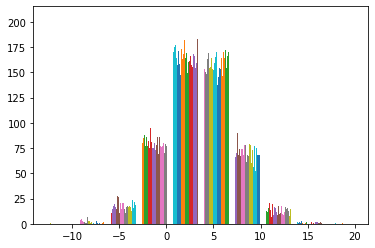

In [13]:
# Use plt.hist to plot histogram to see distribution of time-series data
plt.hist(nd1)
# Which distribution are you getting ?? You will see in future that it is observed in many natural phenomenon

Plotting histogram of Fourier transformed Time Series Data of South half and North Half

([array([191., 278.,  42.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([195., 270.,  44.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([195., 280.,  36.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([197., 272.,  42.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([201., 264.,  46.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([189., 268.,  54.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([201., 260.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([199., 254.,  58.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([189., 292.,  30.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([191., 268.,  52.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([189., 272.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([199., 290.,  22.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([193., 284.,  34.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  array([193., 266.,  52.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
  arra

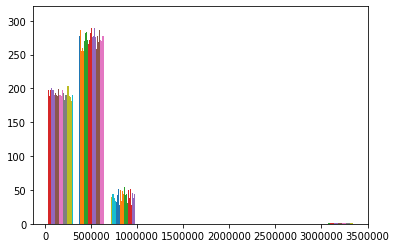

In [14]:
plt.hist(fft_nd1)

([array([ 74.,  82.,  60., 132., 128.,  30.,   4.,   2.,   0.,   0.]),
  array([ 71.,  69.,  74., 134., 142.,  18.,   4.,   0.,   0.,   0.]),
  array([ 72.,  72.,  76., 124., 140.,  22.,   6.,   0.,   0.,   0.]),
  array([ 73.,  67.,  84., 120., 142.,  24.,   2.,   0.,   0.,   0.]),
  array([ 74.,  70.,  78., 134., 126.,  28.,   2.,   0.,   0.,   0.]),
  array([ 70.,  70.,  72., 164., 112.,  24.,   0.,   0.,   0.,   0.]),
  array([ 72.,  58.,  92., 158., 116.,  14.,   0.,   2.,   0.,   0.]),
  array([ 71.,  73.,  74., 138., 124.,  28.,   4.,   0.,   0.,   0.]),
  array([ 70.,  66.,  86., 122., 134.,  34.,   0.,   0.,   0.,   0.]),
  array([ 72.,  72.,  72., 140., 140.,  16.,   0.,   0.,   0.,   0.]),
  array([ 71.,  73.,  84., 116., 146.,  22.,   0.,   0.,   0.,   0.]),
  array([ 70.,  64.,  80., 132., 132.,  30.,   4.,   0.,   0.,   0.]),
  array([ 70.,  76.,  72., 144., 120.,  30.,   0.,   0.,   0.,   0.]),
  array([ 74.,  66.,  80., 164., 102.,  24.,   0.,   2.,   0.,   0.]),
  arra

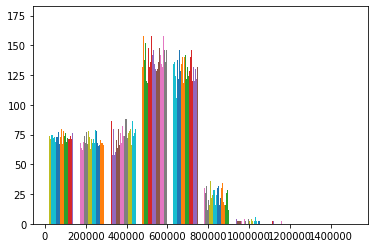

In [34]:
# Use plt.hist to plot histogram to see distribution of square of absolute values of fourier transformed time-series data
plt.hist(fft_sd1)

# Which distribution are you getting? Can you prove this using previous distribution and definition of Fourier transform.

> [NOTE] _You can perform this task in your own way, we provided in this format for your simplification_